In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FixedLocator
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter, FuncFormatter, FixedLocator


In [4]:
round_1 = [8.589889526367188, 16.347143173217773, 17.73064422607422, 18.22532081604004, 19.79175567626953, 19.67475128173828, 19.878862380981445, 19.10670280456543, 20.041318893432617]
round_2 = [8.590093612670898, 15.930194854736328, 18.34764862060547, 18.695533752441406, 19.56327247619629, 19.283245086669922, 19.727678298950195, 18.956056594848633, 19.247360229492188]
round_3 = [9.212156295776367, 15.930194854736328, 17.630878448486328, 18.59825325012207, 19.779857635498047, 19.283245086669922, 19.645156860351562, 19.445701599121094, 19.741209030151367]
psnr_dict = {'Round 1': round_1, 'Round 2': round_2, 'Round 3' : round_3}
psnr_values = pd.DataFrame(data=psnr_dict, index =[1, 2, 4, 6, 8, 16, 32, 64, 128])
psnr_values['average'] = psnr_values.mean(axis=1)
psnr_values.to_csv("psnr_bulldozer_by_nerfstudio.csv")




In [8]:

round_1_2 = [12.313313484191895, 13.671502113342285, 17.9876651763916, 15.304448127746582, 18.237499237060547, 17.1630802154541, 17.389074325561523, 18.198293685913086, 16.29186248779297]
round_2_2 = [12.144606590270996, 13.724095344543457, 18.438884735107422, 15.142380714416504, 18.201915740966797, 17.6131858825683, 17.355234146118164, 17.8895320892334, 16.015380859375]
round_3_2 = [12.472275733947754, 13.776108741760254, 18.375385284423828, 15.31791877746582, 18.297351837158203, 17.36090660095215, 17.79737663269043, 17.595638275146484, 16.05812644958496]
psnr_dict2 = {'Round 1': round_1_2, 'Round 2': round_2_2, 'Round 3' : round_3_2}
psnr_values2 = pd.DataFrame(data=psnr_dict2, index =[1, 2, 4,6,  8, 16, 32, 64, 128])
psnr_values2['average'] = psnr_values2.mean(axis=1)
psnr_values2.to_csv("psnr_wheel_by_nerfstudio.csv")



In [9]:
average_dict = {"Whole reconstructed wheel compared to original wheel" :psnr_values2['average'], "Whole reconstructed bulldozer compared to original bulldozer": psnr_values['average']}

average = pd.DataFrame(data = average_dict, index=[1, 2, 4, 6, 8, 16, 32, 64, 128])
average

,Whole reconstructed wheel compared to original wheel,Whole reconstructed bulldozer compared to original bulldozer
1,12.310065,8.797380
2,13.723902,16.069178
4,18.267312,17.903057
6,15.254916,18.506369
8,18.245589,19.711629
16,17.379058,19.413747
32,17.513895,19.750566
64,17.894488,19.169487
128,16.121790,19.676629


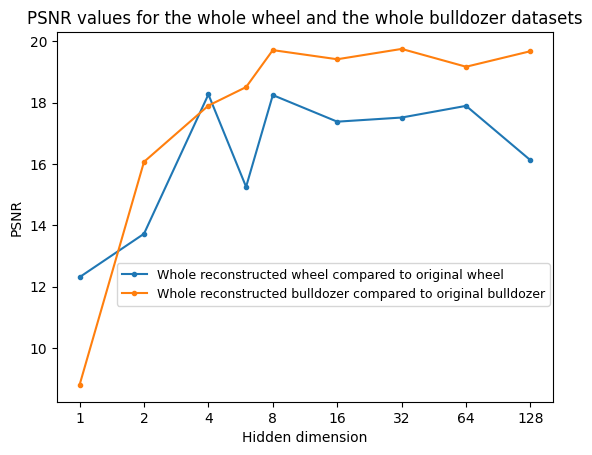

In [10]:
average.plot(style='.-')

plt.legend(loc=(0.12, 0.26), fontsize="9")
plt.title('PSNR values for the whole wheel and the whole bulldozer datasets')
plt.xlabel('Hidden dimension')
plt.ylabel('PSNR')

custom_ticks = [2, 4, 6, 8, 16, 32, 64, 128]  # Customize this list based on your needs
plt.gca().xaxis.set_major_locator(FixedLocator(custom_ticks))
plt.xscale("log", base=2)

def format_ticks(value, pos):
    if value.is_integer():
        return str(int(value))
    else:
        return str(value)

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))

plt.savefig("psnr_by_nerfstudio_plot.png")